In [71]:
import os
import numpy as np
#import scipy
from scipy.io import wavfile
from scipy.signal import get_window
import scipy.fftpack as fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd              #data analysis and maniplation
from tqdm import tqdm            #show progress bar(i.e., downloading or epoch)
import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, LSTM, Conv1D, Conv2D, MaxPooling1D, GlobalMaxPool1D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, layers, Model, callbacks, optimizers
from tensorflow.keras.models import load_model
from numpy import unique
import sklearn

In [72]:
dataset_path ='data'
metadata=pd.read_csv("sign_metadata.csv")

In [73]:
metadata

,fname,label
0,roundabout_sign_0.png,roundabout_sign
1,roundabout_sign_1.png,roundabout_sign
2,roundabout_sign_10.png,roundabout_sign
3,roundabout_sign_11.png,roundabout_sign
4,roundabout_sign_12.png,roundabout_sign
...,...,...
245,yield_sign_5.png,yield_sign
246,yield_sign_6.png,yield_sign
247,yield_sign_7.png,yield_sign
248,yield_sign_8.png,yield_sign


In [74]:
uniLabel=metadata.label.unique()
print(uniLabel.shape)

(5,)


In [75]:
metadata['label'].value_counts()

roundabout_sign    50
stop_sign          50
traffic_cone       50
traffic_light      50
yield_sign         50
Name: label, dtype: int64

In [76]:
extracted_features = []
data = []

# iterrows() generates an iterator object of a dataframe
# "tqdm" generates a progress bar for this for loop
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(dataset_path)+'\\',str(row["fname"]))
    final_class_labels = row["label"]
 
    
    data = np.array(Image.open(file_name))
    #print(data.shape)

    # create an array that contians all the files and their impedence value
    extracted_features.append([data,final_class_labels])

250it [00:00, 718.58it/s]


In [77]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[[[0, 27, 64], [0, 27, 64], [0, 27, 64], [0, 2...",roundabout_sign
1,"[[[2, 27, 67], [2, 27, 67], [2, 27, 67], [2, 2...",roundabout_sign
2,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
3,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
4,"[[[2, 27, 67], [2, 27, 67], [2, 27, 67], [2, 2...",roundabout_sign
5,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
6,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
7,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
8,"[[[0, 28, 67], [0, 28, 67], [0, 28, 67], [0, 2...",roundabout_sign
9,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign


In [78]:
imageData=np.array(extracted_features_df['feature'].tolist())
for i in range(250):
    test =  imageData[i]
    print(test.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [79]:
imageData=np.array(extracted_features_df['feature'].tolist())
imageClass=np.array(extracted_features_df['class'].tolist())


In [80]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
imageClass = to_categorical(labelencoder.fit_transform(imageClass))

In [81]:
from sklearn.model_selection import train_test_split
#split the data set into train and test in protion of 4 to 1.
dataTrain, dataVal, classTrain, classVal = train_test_split(imageData,imageClass,test_size=0.2,random_state=0)

In [82]:
print(classTrain[1])

[0. 0. 0. 1. 0.]


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


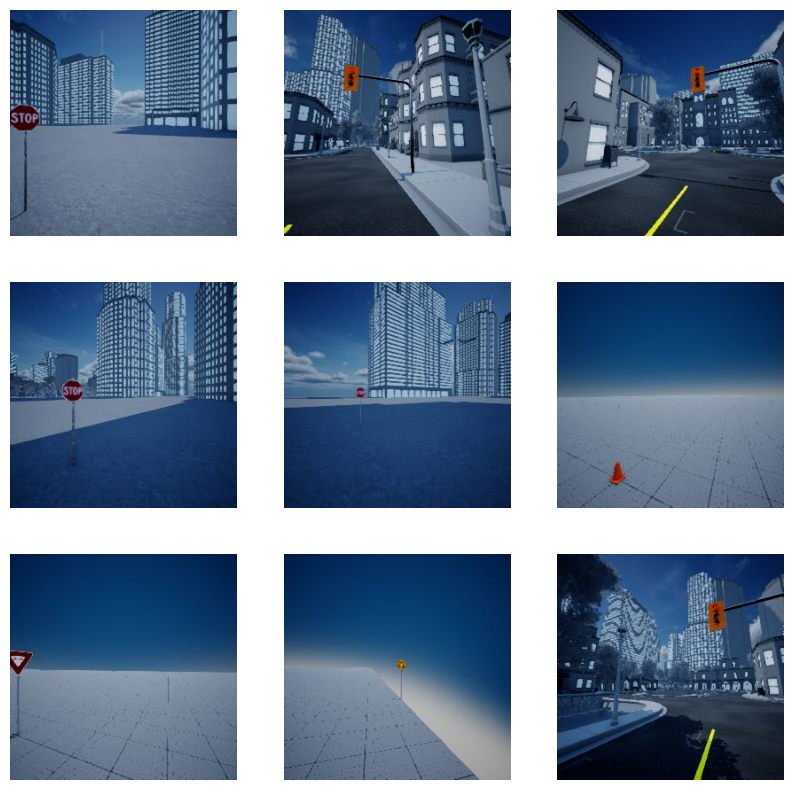

In [83]:
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(dataTrain[i]).astype("uint8"))
    plt.axis("off")
    print(dataTrain[i].shape)

In [84]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5))
model.add(layers.Activation('Softmax'))

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)       

In [86]:
model.build()
model.compile(
    optimizer="Adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy'],
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)       

In [98]:
epochs = 100
num_batch_size = 15

checkpointer = callbacks.ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)

modelHistory=model.fit(
    dataTrain,
    classTrain,
    epochs=epochs,
    batch_size = num_batch_size,
    callbacks=checkpointer,
    validation_data=(dataVal, classVal)
)

Epoch 1/100
12/14 [========================>.....] - ETA: 0s - loss: 6.9344e-05 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.16357, saving model to saved_models\audio_classification.hdf5
14/14 [==============================] - 1s 36ms/step - loss: 6.7187e-05 - accuracy: 1.0000 - val_loss: 0.1636 - val_accuracy: 0.9000
Epoch 2/100
13/14 [==========================>...] - ETA: 0s - loss: 3.8677e-05 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.16357 to 0.16178, saving model to saved_models\audio_classification.hdf5
14/14 [==============================] - 0s 19ms/step - loss: 4.1783e-05 - accuracy: 1.0000 - val_loss: 0.1618 - val_accuracy: 0.9200
Epoch 3/100
13/14 [==========================>...] - ETA: 0s - loss: 3.1749e-05 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.16178 to 0.16016, saving model to saved_models\audio_classification.hdf5
14/14 [==============================] - 0s 18ms/step - loss: 3.2308e-05 - accuracy: 1.0000 - val_loss: 0.1602 - val_a

In [90]:
# a method put data into the model and return prediction

def predictingCSV(data, model):
  # reparing data
  # put data into the model
  print(data.shape)

  data = data.reshape(-1, 256, 256, 3)
  predicted_label = model.predict(data)

  # tranform the label to readable label
  classes_x = np.argmax(predicted_label,axis=1)
  prediction_class = labelencoder.inverse_transform(classes_x)

  print(prediction_class[0])

  return prediction_class[0]

In [92]:
# block that prepare the confusion matrix. In here we use test data.

# declaration
predictedLabels = []
trueLabels = []
model = load_model('saved_models/audio_classification.hdf5')
print(dataVal.shape)
for i in range(dataVal.shape[0]):
  # predicting the test data
  data = dataVal[i]
  predictedLabels.append(predictingCSV(data, model))

  # storing the correct label for the test data
  tempClass = np.ndarray(shape=(1),dtype = int)
  tempClass[0] = np.argmax(classVal[i,:])
  trueLabels.append(labelencoder.inverse_transform(tempClass))

(50, 256, 256, 3)
(256, 256, 3)
1/1 [==============================] - 0s 38ms/step
yield_sign
(256, 256, 3)
1/1 [==============================] - 0s 12ms/step
traffic_cone
(256, 256, 3)
1/1 [==============================] - 0s 12ms/step
stop_sign
(256, 256, 3)
1/1 [==============================] - 0s 10ms/step
traffic_light
(256, 256, 3)
1/1 [==============================] - 0s 12ms/step
traffic_light
(256, 256, 3)
1/1 [==============================] - 0s 13ms/step
traffic_light
(256, 256, 3)
1/1 [==============================] - 0s 13ms/step
traffic_light
(256, 256, 3)
1/1 [==============================] - 0s 11ms/step
stop_sign
(256, 256, 3)
1/1 [==============================] - 0s 12ms/step
stop_sign
(256, 256, 3)
1/1 [==============================] - 0s 11ms/step
traffic_light
(256, 256, 3)
1/1 [==============================] - 0s 11ms/step
roundabout_sign
(256, 256, 3)
1/1 [==============================] - 0s 11ms/step
yield_sign
(256, 256, 3)
1/1 [====================

In [95]:
metadata['label'].value_counts()

roundabout_sign    50
stop_sign          50
traffic_cone       50
traffic_light      50
yield_sign         50
Name: label, dtype: int64

In [94]:
from sklearn import metrics

# Generate the confusion metrix
sum = 0

# confusion matrix: row     ->  true label
#                   column  ->  predicted label
confusionMatrix = metrics.confusion_matrix(trueLabels,predictedLabels)
print("==== file: csv_raw_data_mod ====")
print(confusionMatrix)

# recall = TP/(TP+FN)
print("Recall:\t"+str(metrics.recall_score(trueLabels,predictedLabels,
                                           average = None)))

# precision = TP/(TP+FP)
print("Precision:\t"+str(metrics.precision_score(trueLabels,predictedLabels,
                                              average = None)))

# Accuracy of the model
for i in range(confusionMatrix.shape[0]):
  sum = sum + confusionMatrix[i][i]

print("Accuracy of the model: " + str(sum/dataVal.shape[0]))

==== file: csv_raw_data_mod ====
[[ 3  0  0  0  4]
 [ 0 11  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 15  0]
 [ 1  0  0  0  5]]
Recall:	[0.42857143 1.         1.         1.         0.83333333]
Precision:	[0.75       1.         1.         1.         0.55555556]
Accuracy of the model: 0.9


In [99]:
def plot_model(metrics):
  plt.plot(modelHistory.history[metrics])
  plt.plot(modelHistory.history[f"val_{metrics}"])
  plt.title(f"model{metrics}")
  plt.ylabel(f"{metrics}")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")

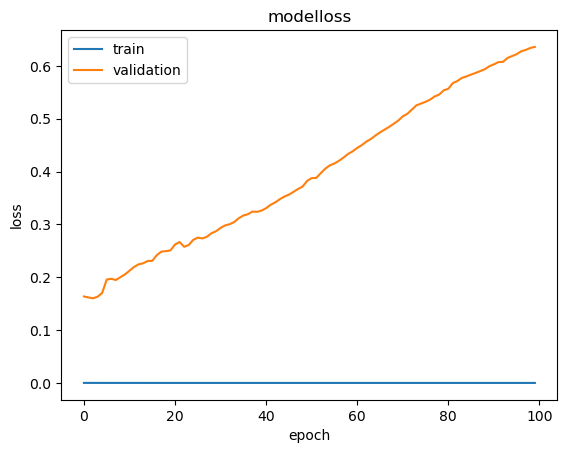

In [100]:
plot_model("loss")

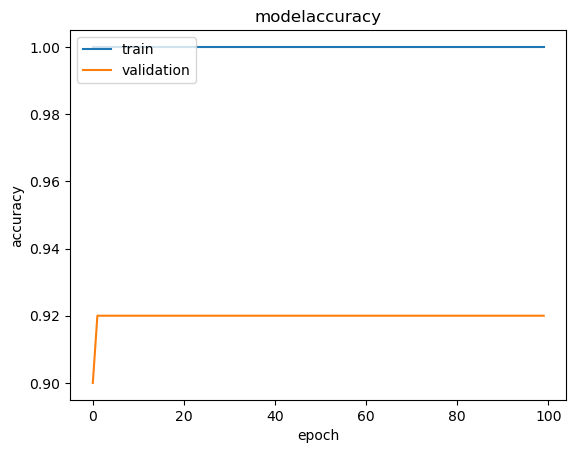

In [101]:
plot_model("accuracy")